#**Algoritmos de ordenação**

Grupo: Leonardo Vicentini, Heloisa dos Santos, Maria Teresa Dias, Melissa Macedo






##**Bucket Sort**
O Bucket Sort é um algoritmo de ordenação que consiste em dividir os dados originais em "baldes", ou seja, agrupados em intervalos menores. Para uma melhor performance do algoritmo, pressupõe-se que os dados sejam uniformemente distribuídos, assim a média de quantidade em cada balde será similar.
Depois de separados, cada balde é ordenado com o auxílio de outro algoritmo e por fim cada balde é reinserido no vetor original, em ordem.

####**Código feito pelo grupo**:


```c
typedef struct{
    int head;
    int bucket[BUCKET_SIZE];
} bucket;

void bucket_sort(int vet[], int n,){
    bucket b[BUCKETS];
    for (int i = 0; i < BUCKETS; i++){
       b[i].head = 0;
    }

    for (int i = 0; i < n; i++){
        int j = BUCKETS - 1;
        while (j >= 0){
            if (vet[i] >= j * MAX){
                b[j].bucket[b[j].head] = vet[i];
                (b[j].head)++;
                break;
            }
            j--;
        }
    }

    for (int i = 0; i < BUCKETS; i++){
        if (b[i].head) bubble_sort(b[i].bucket, b[i].head, comps, trocas, secs);
    }

    int i = 0;
    while (i < n){
        for (int j = 0; j < BUCKETS; j++){
            for (int k = 0; k < b[j].head; k++){
                 vet[i] = b[j].bucket[k];
                i++;
            }
        }
    }
}
```

##**Vantagens e Desvantagens**


* Vantagens:
  *   Maior eficiência para dados distribuidos de modo uniforme (com probabilidades iguais e previsíveis para a ocorrência de cada valor) e valores com um alcance conhecido.
  *   Possui grande adaptabilidade devido a possibilidade de escolha de outros algorítmos de ordenação.
  *   Extremamente rápido e eficaz nos melhores casos.

* Desvantagens:
  *   Ineficiência para dados não uniformes e com valores desconhecidos.
  *   Uso de memória adicional para criação de buckets.
  *   Dependente de outro algorítmo de ordenação implementado em seus buckets, portanto a eficiência pode variar dependendo da escolha.
  *   Maior número de comparações e trocas em comparação a outros algorítmos, devido ao agrupamento inicial.






###**Complexidade de Tempo e Memória**

A Complexidade de tempo do Bucket Sort está ligada diretamente ao algorítmo de ordenação escolhido em seus buckets e varia bastante entre o melhor e pior dos casos, tendo complexidade O(n) nos melhores casos e O(n²) nos piores casos.

Já a complexidade de memória sempre será maior em relação ao algorítmo escolhido devido à necessidade da adição dos espaços para organização, portanto será proporcional ao número de buckets implementados (k) tendo complexidade O(n+k)


```c
typedef struct{
    int head;
    int bucket[BUCKET_SIZE];
} bucket;

void bucket_sort(int vet[], int n,){
    bucket b[BUCKETS];
    for (int i = 0; i < BUCKETS; i++){
       b[i].head = 0; //COMPLEXIDADE O(N)
    }

    for (int i = 0; i < n; i++){
        int j = BUCKETS - 1;
        while (j >= 0){
            if (vet[i] >= j * MAX){
                b[j].bucket[b[j].head] = vet[i];
                (b[j].head)++;
                break;
            }
            j--;
        }
        //COMPLEXIDADE O(k*N) -> O(N)
        //O loop interno depende de k quantidade de baldes, e roda até
        //encontrar o balde a qual o elemento pertence. o loop externo roda N vezes
    }

    for (int i = 0; i < BUCKETS; i++){
        if (b[i].head) bubble_sort(b[i].bucket, b[i].head, comps, trocas, secs);
        //COMPLEXIDADE O(N+(N^2)/k)
        //Para cada bubble sort, a complexidade é O(ni^2), n sendo a quantidade no balde i
        //A chance de um elemento estar num balde é de 1/k, daí
        //a somatória das complexidades O(ni^2) tem esperança igual a (N+N^2/k)
        //se escolhido k = N, então
        //COMPLEXIDADE O(N+N) = O(N)
    }

    int i = 0;
    while (i < n){
        for (int j = 0; j < BUCKETS; j++){
            for (int k = 0; k < b[j].head; k++){
                 vet[i] = b[j].bucket[k];
                i++;
            }
        }
      //COMPLEXIDADE O(N)
      //loop interior roda a quantidade de elementos num bucket e loop do meio roda a quantidade de buckets.
      //no final, as operações aconteceriam no máximo N vezes
    }
}
```

##**Resultados de teste**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###**Vetor aleatório**


In [ ]:
bubble = pd.read_csv("vet aleatorio/bubble_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bubble['alg'] = 'bubble'
bucket = pd.read_csv("vet aleatorio/bucket_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bucket['alg'] = 'bucket'
insertion = pd.read_csv("vet aleatorio/insertion_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
insertion['alg'] = 'insertion'
merge = pd.read_csv("vet aleatorio/merge_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
merge['alg'] = 'merge'
quick = pd.read_csv("vet aleatorio/quick_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
quick['alg'] = 'quick'
selection = pd.read_csv("vet aleatorio/selection_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
selection['alg'] = 'selection'
shell = pd.read_csv("vet aleatorio/shell_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
shell['alg'] = 'shell'

#####**10 elementos**


In [ ]:
bubble_10 = bubble[0:10]
bucket_10 = bucket[0:10]
insertion_10 = insertion[0:10]
merge_10 = merge[0:10]
quick_10 = quick[0:10]
selection_10 = selection[0:10]
shell_10 = shell[0:10]

In [ ]:
al_teste_10 = pd.concat([bubble_10,bucket_10, insertion_10, merge_10, quick_10, selection_10, shell_10])
al_teste_10['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(al_teste_10)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(al_teste_10)]
al_teste_10 = al_teste_10.set_index(['alg', 'index'])


<Axes: xlabel='alg'>

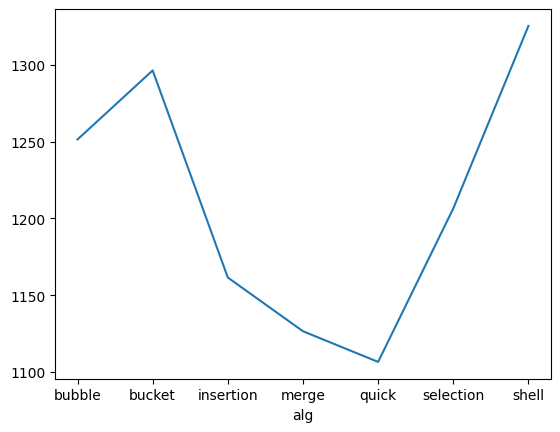

In [ ]:
al_teste_10.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

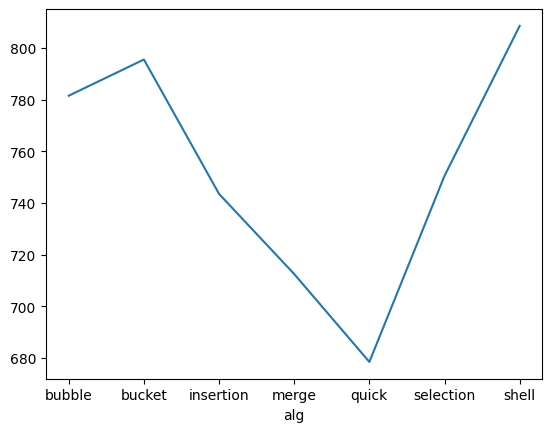

In [ ]:
al_teste_10.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

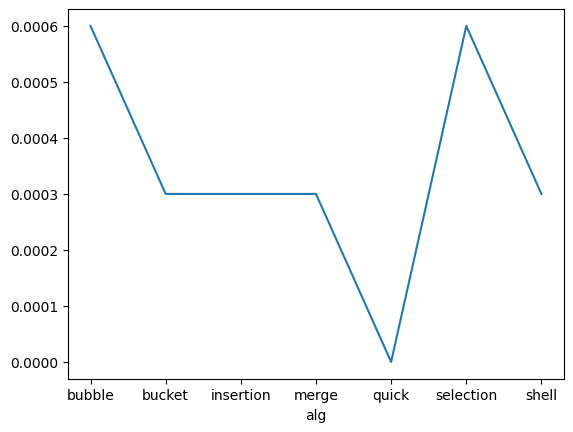

In [ ]:
al_teste_10.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

#####**100 elementos**

In [ ]:
bubble_100 = bubble[10:20]
bucket_100 =bucket[10:20]
insertion_100 = insertion[10:20]
merge_100 = merge[10:20]
quick_100 = quick[10:20]
selection_100 = selection[10:20]
shell_100 = shell[10:20]

In [ ]:
al_teste_100 = pd.concat([bubble_100,bucket_100, insertion_100, merge_100, quick_100, selection_100, shell_100])
al_teste_100['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(al_teste_100)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(al_teste_100)]
al_teste_100 = al_teste_100.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

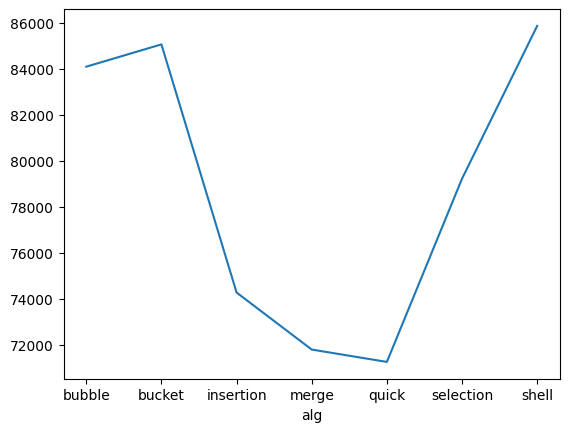

In [ ]:
al_teste_100.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

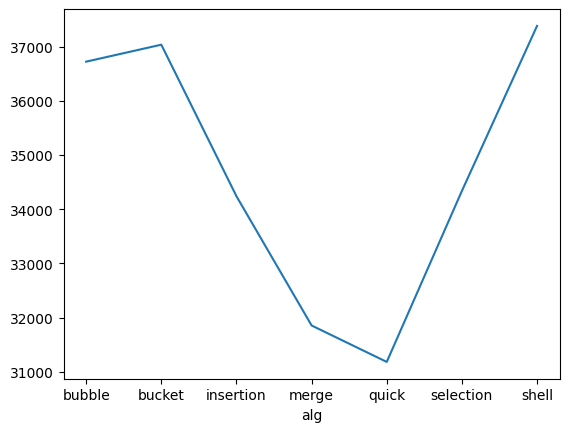

In [ ]:
al_teste_100.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

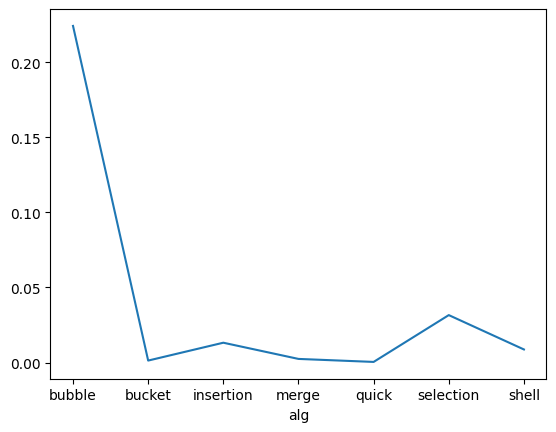

In [ ]:
al_teste_100.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

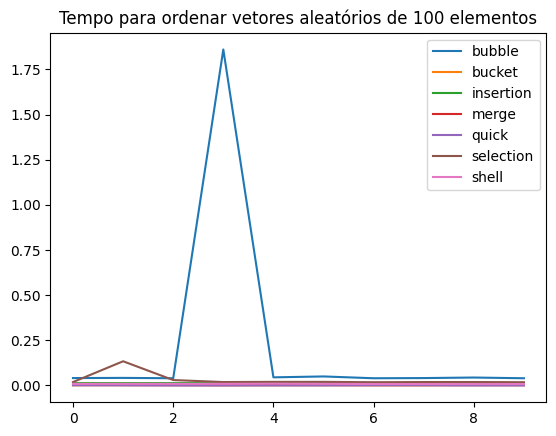

In [ ]:
fig, ax = plt.subplots()

for date, new_df in al_teste_100.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores aleatórios de 100 elementos')

plt.show()

#####**1000 elementos**

In [ ]:
bubble_1000 = bubble[20:]
bucket_1000 =bucket[20:]
insertion_1000 = insertion[20:]
merge_1000 = merge[20:]
quick_1000 = quick[20:]
selection_1000 = selection[20:]
shell_1000 = shell[20:]

In [ ]:
al_teste_1000 = pd.concat([bubble_1000,bucket_1000, insertion_1000, merge_1000, quick_1000, selection_1000, shell_1000])
al_teste_1000['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(al_teste_1000)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(al_teste_1000)]
al_teste_1000 = al_teste_1000.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

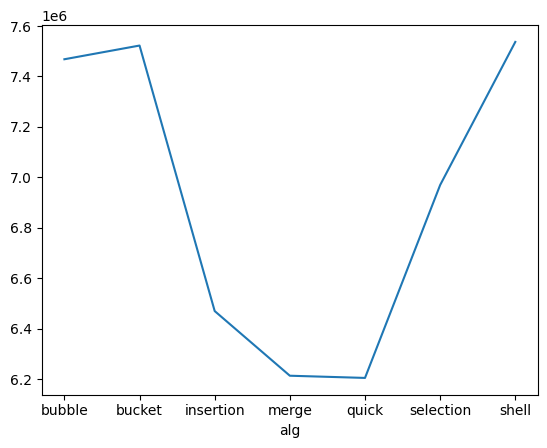

In [ ]:
al_teste_1000.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

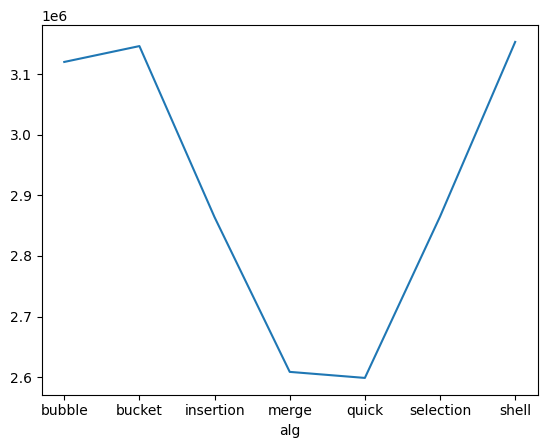

In [ ]:
al_teste_1000.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

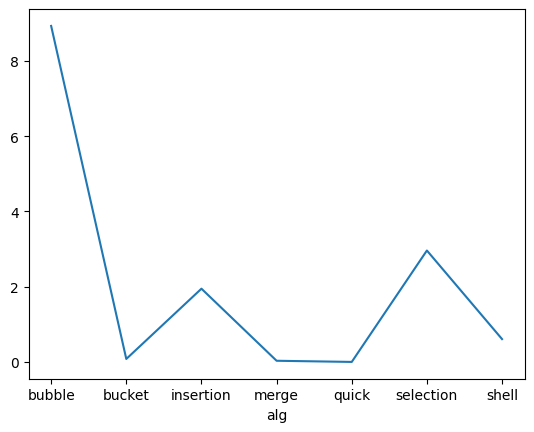

In [ ]:
al_teste_1000.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

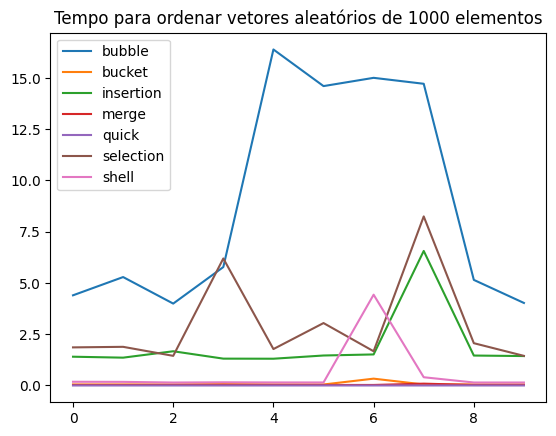

In [ ]:
fig, ax = plt.subplots()

for date, new_df in al_teste_1000.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores aleatórios de 1000 elementos')

plt.show()

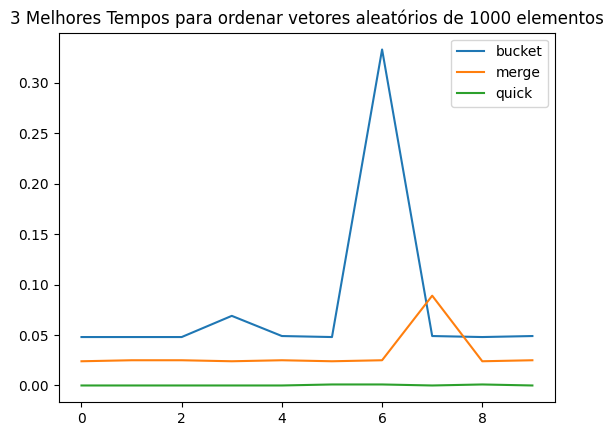

In [ ]:
three_best = al_teste_1000[al_teste_1000.index.isin([ 'bucket', 'merge', 'quick'], level=0)]
fig, ax = plt.subplots()

for date, new_df in three_best.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('3 Melhores Tempos para ordenar vetores aleatórios de 1000 elementos')

plt.show()

###**Vetor crescente**


In [ ]:
bubble = pd.read_csv("vet crescente/bubble_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bubble['alg'] = 'bubble'
bucket = pd.read_csv("vet crescente/bucket_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bucket['alg'] = 'bucket'
insertion = pd.read_csv("vet crescente/insertion_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
insertion['alg'] = 'insertion'
merge = pd.read_csv("vet crescente/merge_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
merge['alg'] = 'merge'
quick = pd.read_csv("vet crescente/quick_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
quick['alg'] = 'quick'
selection = pd.read_csv("vet crescente/selection_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
selection['alg'] = 'selection'
shell = pd.read_csv("vet crescente/shell_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
shell['alg'] = 'shell'

#####**10 elementos**


In [ ]:
bubble_10 = bubble[0:10]
bucket_10 = bucket[0:10]
insertion_10 = insertion[0:10]
merge_10 = merge[0:10]
quick_10 = quick[0:10]
selection_10 = selection[0:10]
shell_10 = shell[0:10]

In [ ]:
cres_teste_10 = pd.concat([bubble_10,bucket_10, insertion_10, merge_10, quick_10, selection_10, shell_10])
cres_teste_10['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(cres_teste_10)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(cres_teste_10)]
cres_teste_10 = cres_teste_10.set_index(['alg', 'index'])


<Axes: xlabel='alg'>

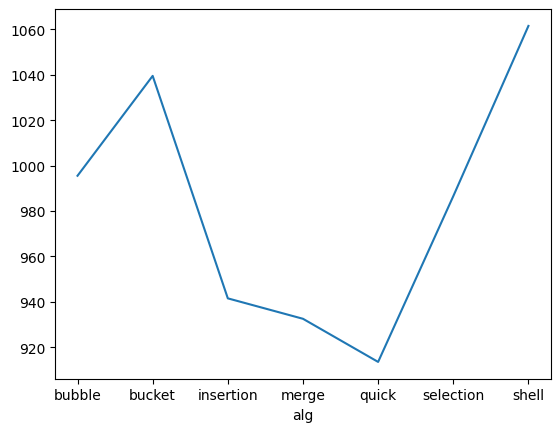

In [ ]:
cres_teste_10.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

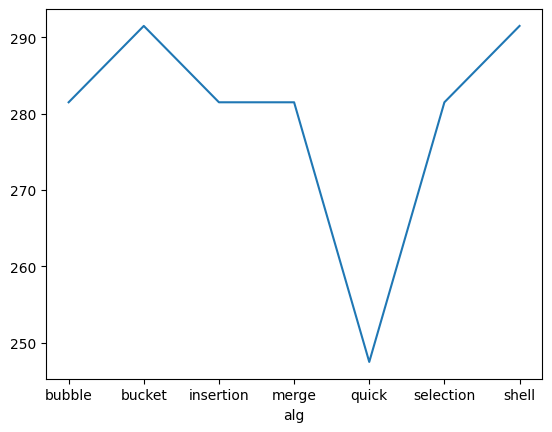

In [ ]:
cres_teste_10.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

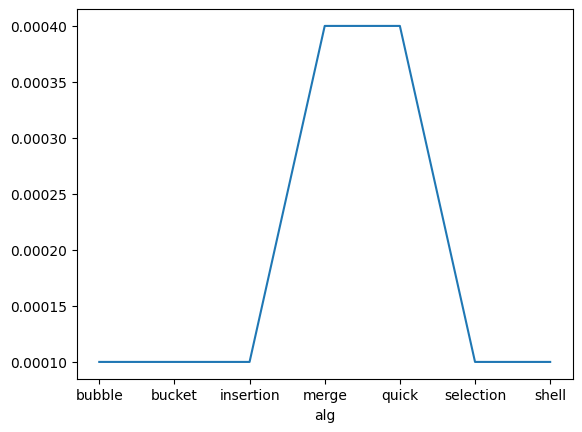

In [ ]:
cres_teste_10.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

#####**100 elementos**

In [ ]:
bubble_100 = bubble[10:20]
bucket_100 =bucket[10:20]
insertion_100 = insertion[10:20]
merge_100 = merge[10:20]
quick_100 = quick[10:20]
selection_100 = selection[10:20]
shell_100 = shell[10:20]

In [ ]:
cres_teste_100 = pd.concat([bubble_100,bucket_100, insertion_100, merge_100, quick_100, selection_100, shell_100])
cres_teste_100['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(cres_teste_100)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(cres_teste_100)]
cres_teste_100 = cres_teste_100.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

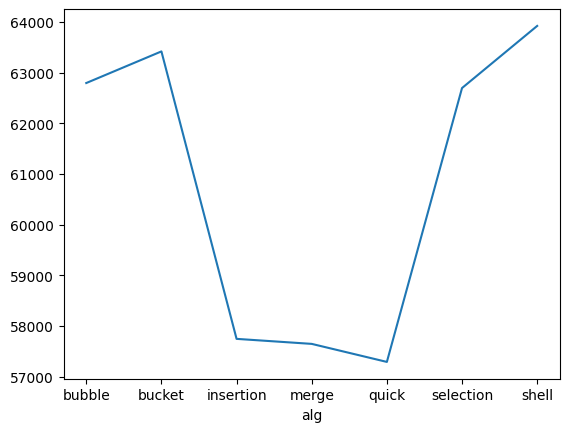

In [ ]:
cres_teste_100.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

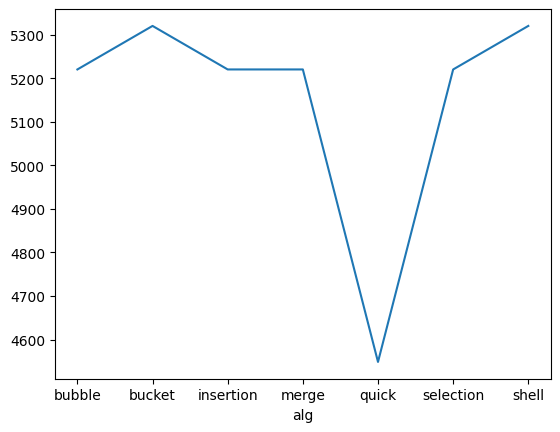

In [ ]:
cres_teste_100.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

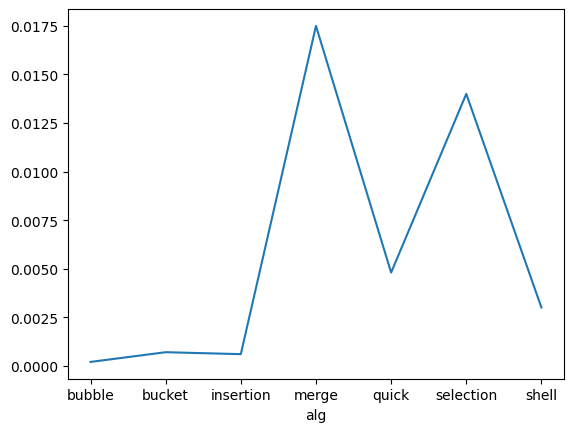

In [ ]:
cres_teste_100.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

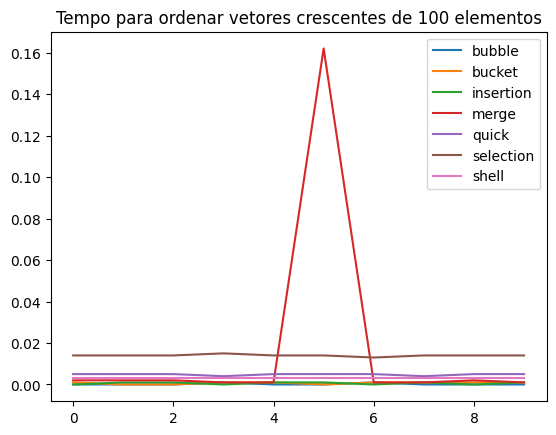

In [ ]:
fig, ax = plt.subplots()

for date, new_df in cres_teste_100.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores crescentes de 100 elementos')

plt.show()

#####**1000 elementos**

In [ ]:
bubble_1000 = bubble[20:]
bucket_1000 =bucket[20:]
insertion_1000 = insertion[20:]
merge_1000 = merge[20:]
quick_1000 = quick[20:]
selection_1000 = selection[20:]
shell_1000 = shell[20:]

In [ ]:
cres_teste_1000 = pd.concat([bubble_1000,bucket_1000, insertion_1000, merge_1000, quick_1000, selection_1000, shell_1000])
cres_teste_1000['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(cres_teste_1000)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(cres_teste_1000)]
cres_teste_1000 = cres_teste_1000.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

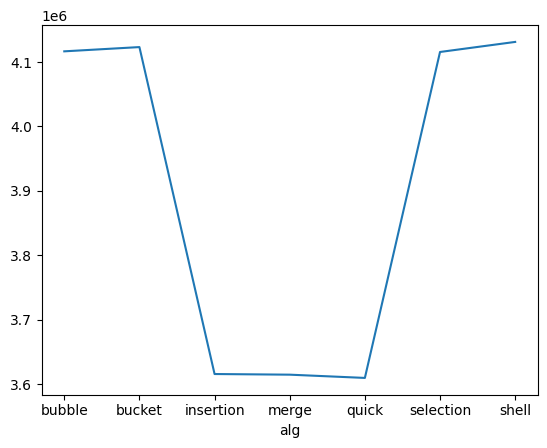

In [ ]:
cres_teste_1000.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

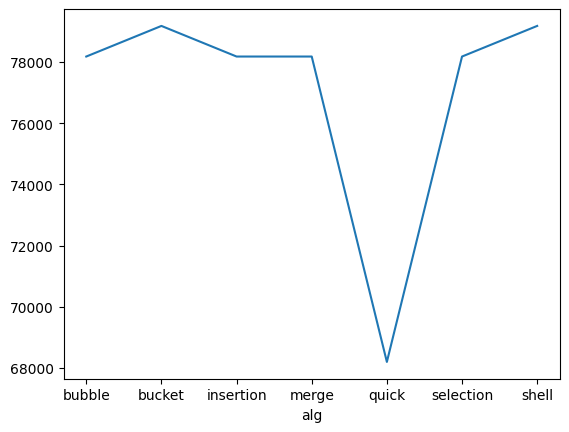

In [ ]:
cres_teste_1000.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

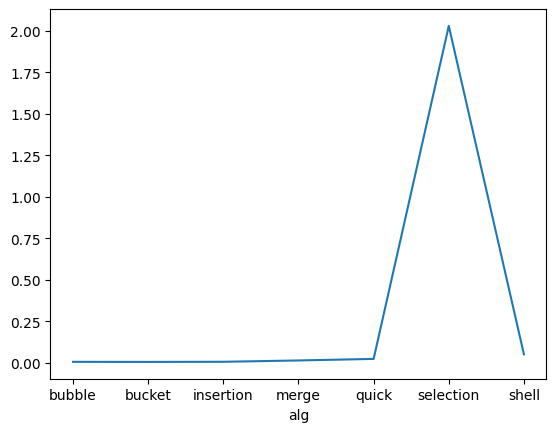

In [ ]:
cres_teste_1000.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

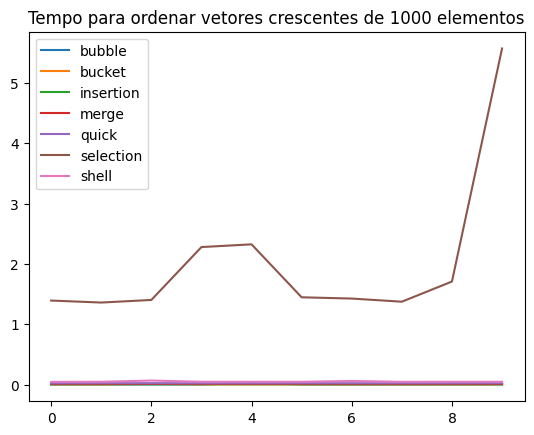

In [ ]:
fig, ax = plt.subplots()

for date, new_df in cres_teste_1000.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores crescentes de 1000 elementos')

plt.show()

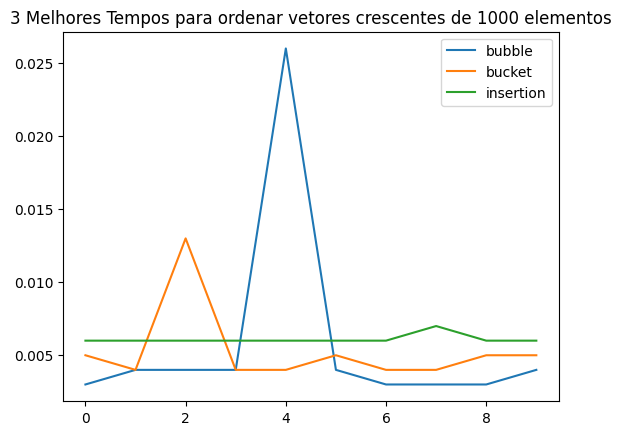

In [ ]:
three_best = cres_teste_1000[cres_teste_1000.index.isin(['bubble', 'bucket', 'insertion'], level=0)]
fig, ax = plt.subplots()

for date, new_df in three_best.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('3 Melhores Tempos para ordenar vetores crescentes de 1000 elementos')

plt.show()

###**Vetor decrescente**


In [ ]:
bubble = pd.read_csv("vet decrescente/bubble_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bubble['alg'] = 'bubble'
bucket = pd.read_csv("vet decrescente/bucket_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bucket['alg'] = 'bucket'
insertion = pd.read_csv("vet decrescente/insertion_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
insertion['alg'] = 'insertion'
merge = pd.read_csv("vet decrescente/merge_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
merge['alg'] = 'merge'
quick = pd.read_csv("vet decrescente/quick_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
quick['alg'] = 'quick'
selection = pd.read_csv("vet decrescente/selection_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
selection['alg'] = 'selection'
shell = pd.read_csv("vet decrescente/shell_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
shell['alg'] = 'shell'

#####**10 elementos**


In [ ]:
bubble_10 = bubble[0:10]
bucket_10 = bucket[0:10]
insertion_10 = insertion[0:10]
merge_10 = merge[0:10]
quick_10 = quick[0:10]
selection_10 = selection[0:10]
shell_10 = shell[0:10]

In [ ]:
dec_teste_10 = pd.concat([bubble_10,bucket_10, insertion_10, merge_10, quick_10, selection_10, shell_10])
dec_teste_10['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(dec_teste_10)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(dec_teste_10)]
dec_teste_10 = dec_teste_10.set_index(['alg', 'index'])


<Axes: xlabel='alg'>

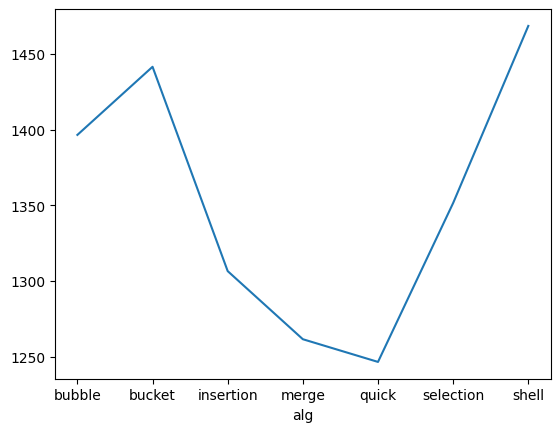

In [ ]:
dec_teste_10.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

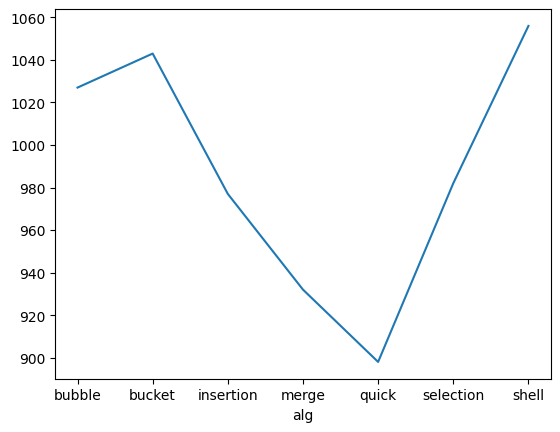

In [ ]:
dec_teste_10.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

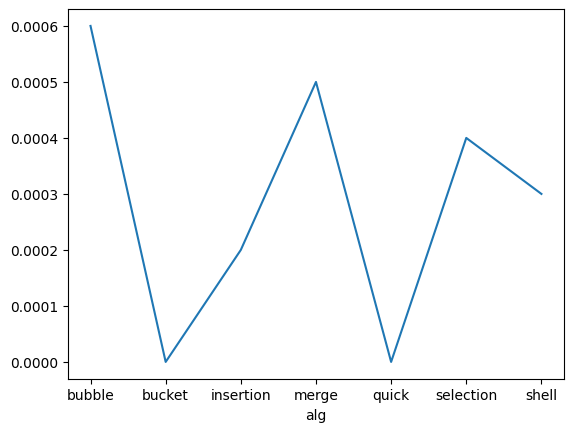

In [ ]:
dec_teste_10.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

#####**100 elementos**

In [ ]:
bubble_100 = bubble[10:20]
bucket_100 =bucket[10:20]
insertion_100 = insertion[10:20]
merge_100 = merge[10:20]
quick_100 = quick[10:20]
selection_100 = selection[10:20]
shell_100 = shell[10:20]

In [ ]:
dec_teste_100 = pd.concat([bubble_100,bucket_100, insertion_100, merge_100, quick_100, selection_100, shell_100])
dec_teste_100['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(dec_teste_100)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(dec_teste_100)]
dec_teste_100 = dec_teste_100.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

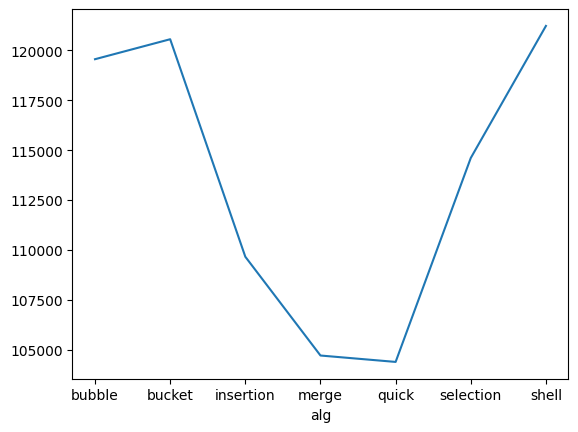

In [ ]:
dec_teste_100.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

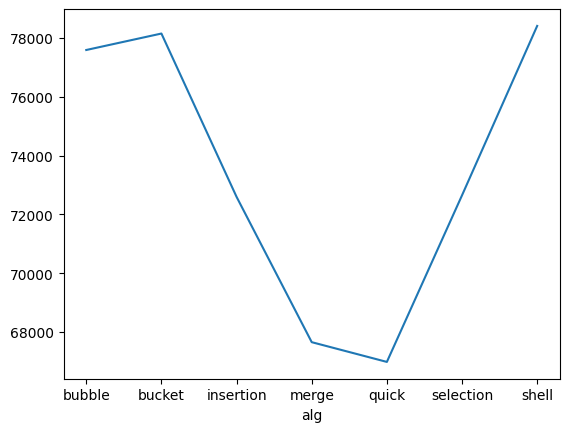

In [ ]:
dec_teste_100.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

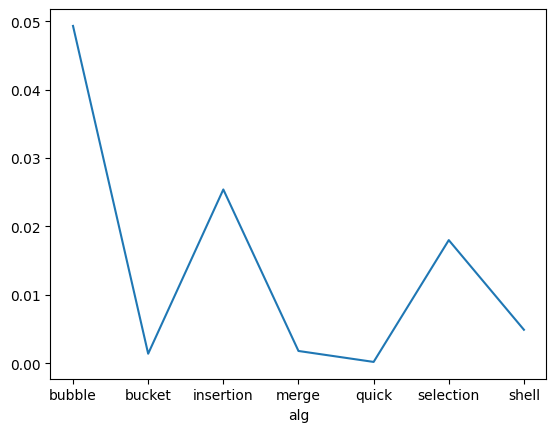

In [ ]:
dec_teste_100.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

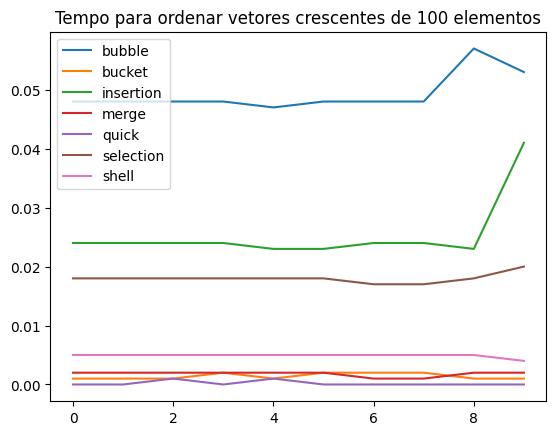

In [ ]:
fig, ax = plt.subplots()

for date, new_df in dec_teste_100.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores decrescentes de 100 elementos')

plt.show()

#####**1000 elementos**

In [ ]:
bubble_1000 = bubble[20:]
bucket_1000 =bucket[20:]
insertion_1000 = insertion[20:]
merge_1000 = merge[20:]
quick_1000 = quick[20:]
selection_1000 = selection[20:]
shell_1000 = shell[20:]

In [ ]:
dec_teste_1000 = pd.concat([bubble_1000,bucket_1000, insertion_1000, merge_1000, quick_1000, selection_1000, shell_1000])
dec_teste_1000['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(dec_teste_1000)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(dec_teste_1000)]
dec_teste_1000 = dec_teste_1000.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

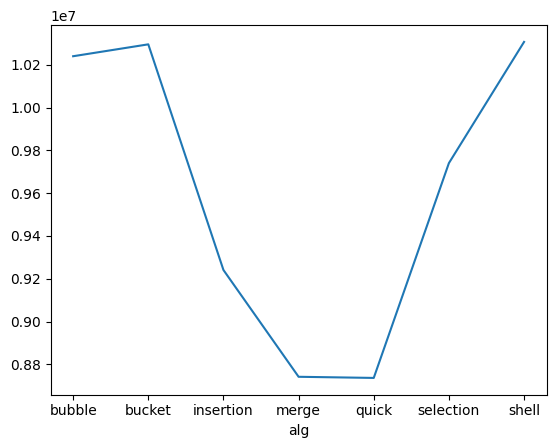

In [ ]:
dec_teste_1000.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

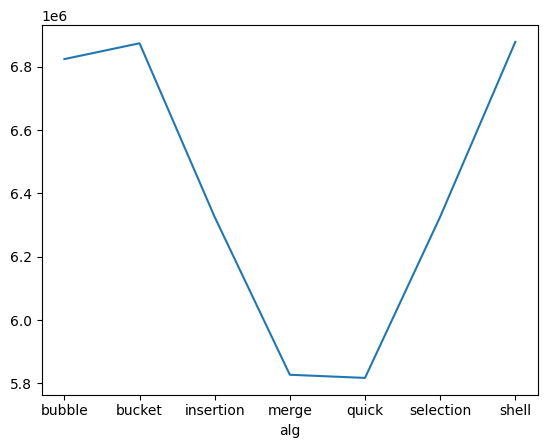

In [ ]:
dec_teste_1000.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

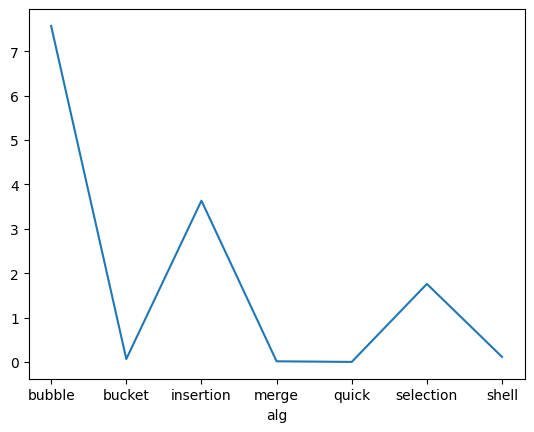

In [ ]:
dec_teste_1000.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

In [ ]:
fig, ax = plt.subplots()

for date, new_df in dec_teste_1000.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores decrescentes de 1000 elementos')

plt.show()

NameError: ignored

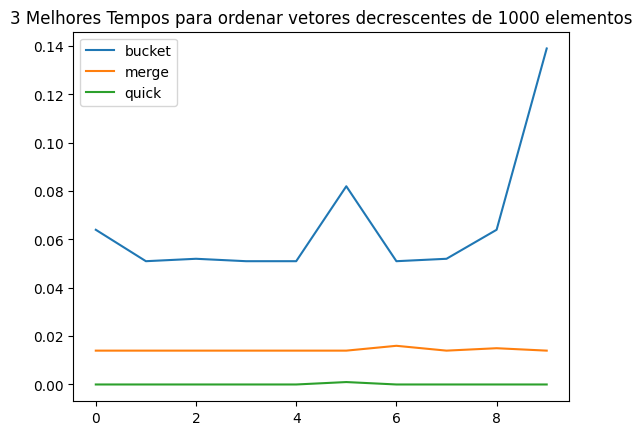

In [ ]:
three_best = dec_teste_1000[dec_teste_1000.index.isin(['merge', 'bucket', 'quick'], level=0)]
fig, ax = plt.subplots()

for date, new_df in three_best.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('3 Melhores Tempos para ordenar vetores decrescentes de 1000 elementos')

plt.show()

###**Vetor quase ordenado**


In [ ]:
bubble = pd.read_csv("vet quasi/bubble_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bubble['alg'] = 'bubble'
bucket = pd.read_csv("vet quasi/bucket_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
bucket['alg'] = 'bucket'
insertion = pd.read_csv("vet quasi/insertion_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
insertion['alg'] = 'insertion'
merge = pd.read_csv("vet quasi/merge_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
merge['alg'] = 'merge'
quick = pd.read_csv("vet quasi/quick_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
quick['alg'] = 'quick'
selection = pd.read_csv("vet quasi/selection_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
selection['alg'] = 'selection'
shell = pd.read_csv("vet quasi/shell_sort.txt", names=['trocas', 'comparações', 'tempo (ms)'])
shell['alg'] = 'shell'

#####**10 elementos**


In [ ]:
bubble_10 = bubble[0:10]
bucket_10 = bucket[0:10]
insertion_10 = insertion[0:10]
merge_10 = merge[0:10]
quick_10 = quick[0:10]
selection_10 = selection[0:10]
shell_10 = shell[0:10]

In [ ]:
qua_teste_10 = pd.concat([bubble_10,bucket_10, insertion_10, merge_10, quick_10, selection_10, shell_10])
qua_teste_10['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(qua_teste_10)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(qua_teste_10)]
qua_teste_10 = qua_teste_10.set_index(['alg', 'index'])


<Axes: xlabel='alg'>

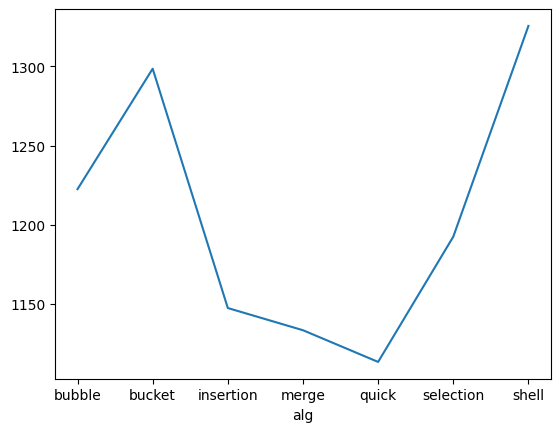

In [ ]:
qua_teste_10.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

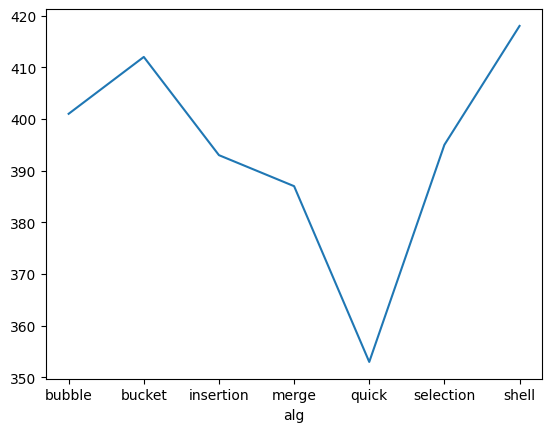

In [ ]:
qua_teste_10.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

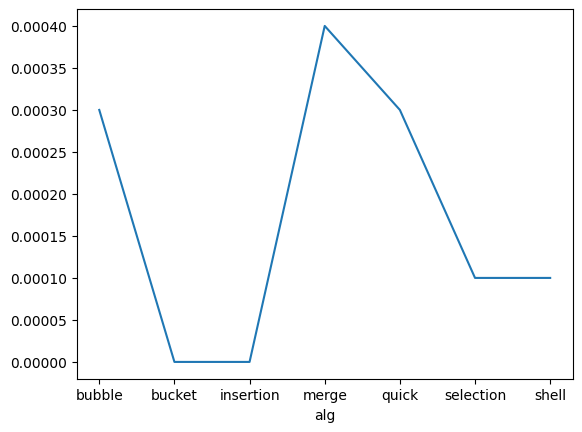

In [ ]:
qua_teste_10.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

#####**100 elementos**

In [ ]:
bubble_100 = bubble[10:20]
bucket_100 =bucket[10:20]
insertion_100 = insertion[10:20]
merge_100 = merge[10:20]
quick_100 = quick[10:20]
selection_100 = selection[10:20]
shell_100 = shell[10:20]

In [ ]:
qua_teste_100 = pd.concat([bubble_100,bucket_100, insertion_100, merge_100, quick_100, selection_100, shell_100])
qua_teste_100['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(qua_teste_100)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(qua_teste_100)]
qua_teste_100 = qua_teste_100.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

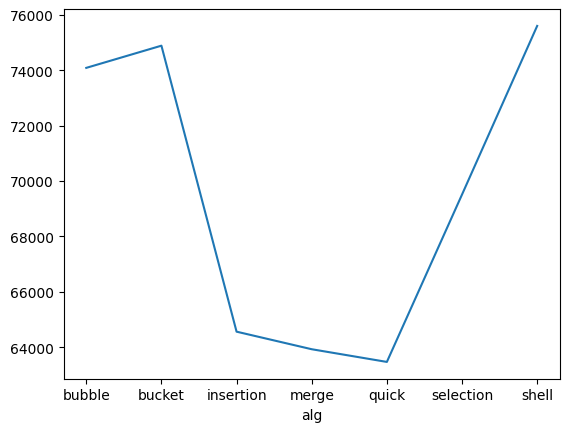

In [ ]:
qua_teste_100.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

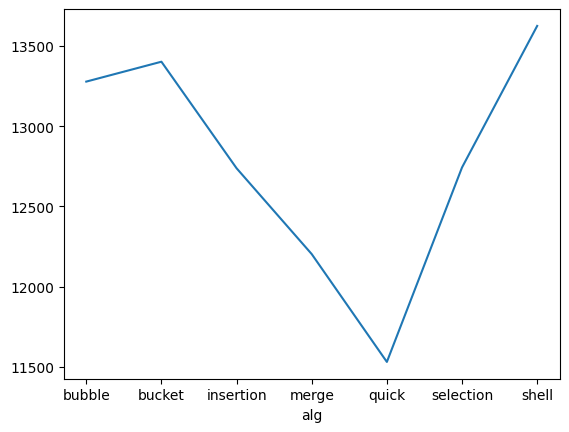

In [ ]:
qua_teste_100.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

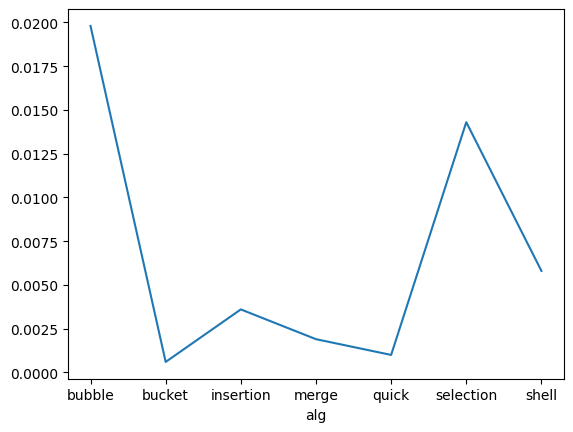

In [ ]:
qua_teste_100.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

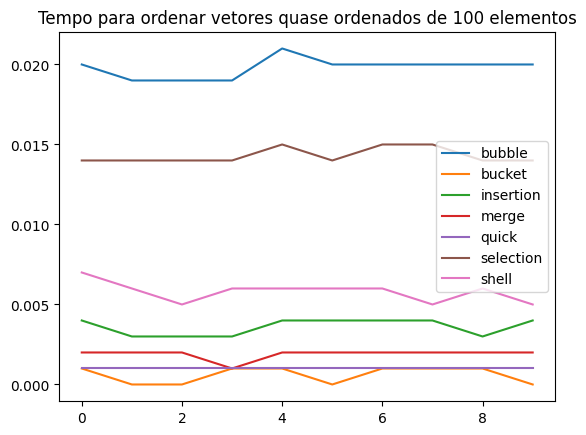

In [ ]:
fig, ax = plt.subplots()

for date, new_df in qua_teste_100.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores quase ordenados de 100 elementos')

plt.show()

#####**1000 elementos**

In [ ]:
bubble_1000 = bubble[20:]
bucket_1000 =bucket[20:]
insertion_1000 = insertion[20:]
merge_1000 = merge[20:]
quick_1000 = quick[20:]
selection_1000 = selection[20:]
shell_1000 = shell[20:]

In [ ]:
qua_teste_1000 = pd.concat([bubble_1000,bucket_1000, insertion_1000, merge_1000, quick_1000, selection_1000, shell_1000])
qua_teste_1000['index'] = np.tile([0,1,2,3,4,5,6,7,8,9], len(qua_teste_1000)//len([0,1,2,3,4,5,6,7,8,9])+1)[:len(qua_teste_1000)]
qua_teste_1000 = qua_teste_1000.set_index(['alg', 'index'])

<Axes: xlabel='alg'>

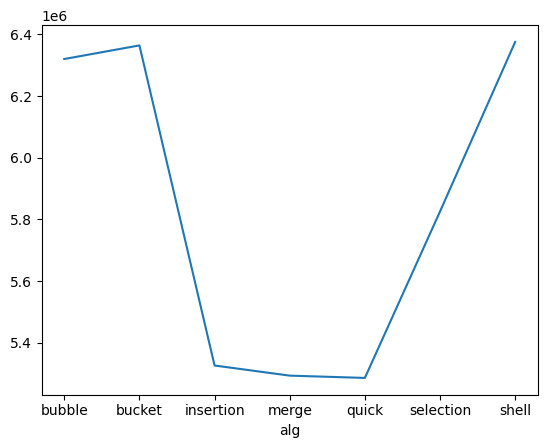

In [ ]:
qua_teste_1000.groupby('alg',group_keys=True)['trocas'].mean().plot()

<Axes: xlabel='alg'>

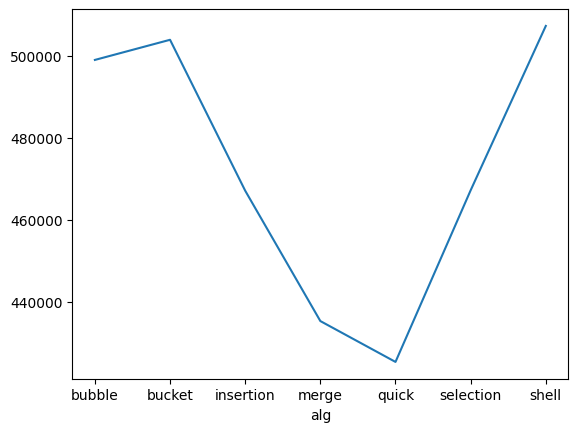

In [ ]:
qua_teste_1000.groupby('alg',group_keys=True)['comparações'].mean().plot()

<Axes: xlabel='alg'>

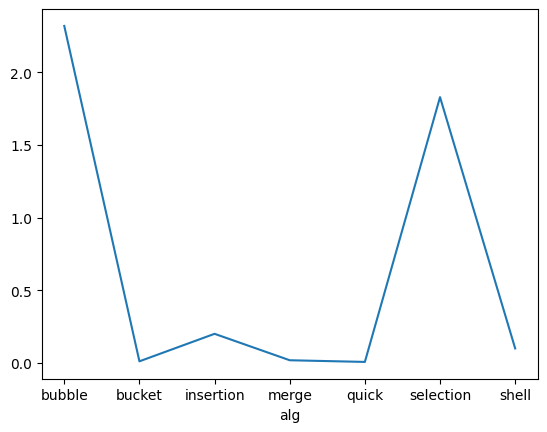

In [ ]:
qua_teste_1000.groupby('alg',group_keys=True)['tempo (ms)'].mean().plot()

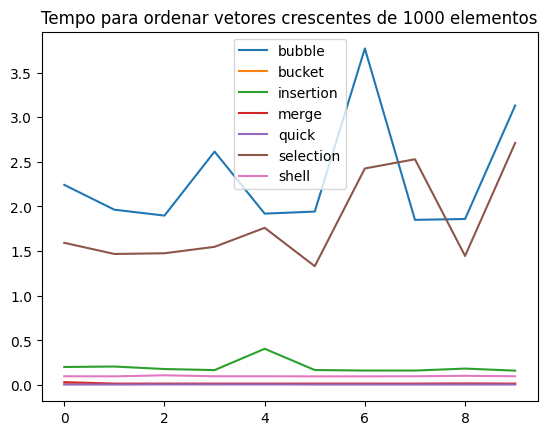

In [ ]:
fig, ax = plt.subplots()

for date, new_df in qua_teste_1000.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('Tempo para ordenar vetores quase ordenados de 1000 elementos')

plt.show()

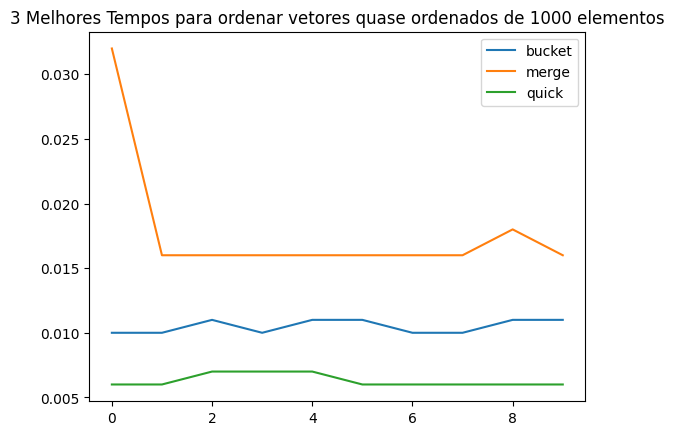

In [ ]:
three_best = qua_teste_1000[dec_teste_1000.index.isin(['merge', 'bucket', 'quick'], level=0)]
fig, ax = plt.subplots()

for date, new_df in three_best.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('index').values,
            new_df['tempo (ms)'],
            label = new_df.index.get_level_values('alg').values[0],
            linestyle = '-')

ax.legend(frameon = True)
plt.title('3 Melhores Tempos para ordenar vetores quase ordenados de 1000 elementos')

plt.show()

##**Análise**
O Bucket Sort é um algoritmo de ordenação extremamente adaptável porém sensível ao padrão de distribuição dos dados e à escolha do algoritmo de ordenação interno, tendo sua complexidade de tempo e memória variando bastante entre os melhores e piores casos desses fatores.

Portanto, tendo em vista situações específicas, como uma distribuição uniforme dos dados e uma escolha correta do sort interno, concluí-se que o Bucket Sort pode ser muito eficiente em questão de complexidade de tempo em comparação a outros algorítmos, sendo fundamental a análise cuidadosa do contexto de aplicação antes de escolher esse algoritmo.